# Análisis de los 25 retailers más grandes de Estados Unidos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/work/largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

Para conocer cuál es la empresa número 1 en ventas:

In [ ]:
df_sorted = df.sort_values('Sales', ascending=0)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


In [ ]:
df_sorted_sales = df.sort_values('Sales', ascending=0)
sales = df_sorted['Sales'][1:24]
sales = str(sales.mean())
print('El promedio de las ventas de las empresas exceptuando la primera (Walmart) es $' + sales)

El promedio de las ventas de las empresas exceptuando la primera (Walmart) es $47907.217391304344


### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

Text(0.5, 0, 'Ventas en millones de dólares')

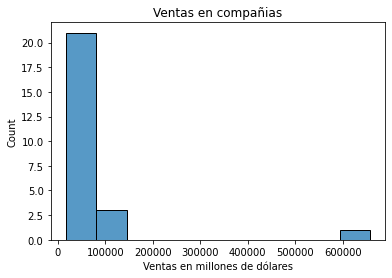

In [ ]:
sns.histplot(df['Sales'], bins=10)
plt.title('Ventas en compañias')
plt.xlabel('Ventas en millones de dólares')

A partir de este gráfico se puede visualizar que la mayoría de las compañías realizaron entre 5 y 15 millones de dólares y existe una empresa que hizo muchísimas más ventas(Walmart). Podemos ver cuáles son las empresas que realizaron esas ventas exceptuando Walmart.

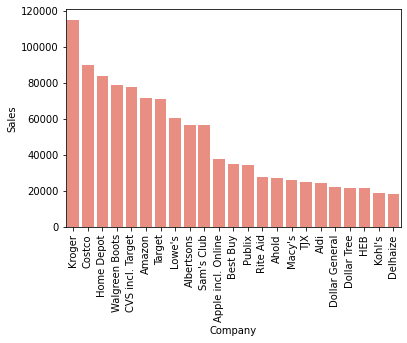

In [ ]:
grafico = sns.barplot(x = 'Company', y = 'Sales', data = df[1:24], color='salmon')
for item in grafico.get_xticklabels():
    item.set_rotation(90)

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

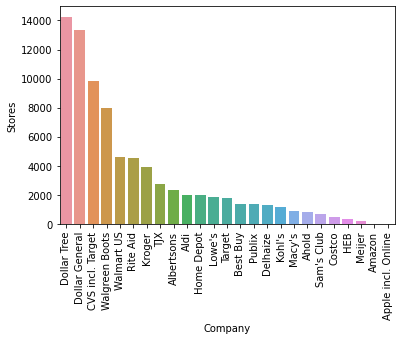

In [ ]:
df_sorted_stores = df.sort_values('Stores', ascending=0)
grafico = sns.barplot(x='Company', y='Stores', data=df_sorted_stores)
for item in grafico.get_xticklabels():
    item.set_rotation(90)


La&nbsp;anterior&nbsp;gráfica&nbsp;nos&nbsp;muestra&nbsp;que&nbsp;la&nbsp;mayoría&nbsp;de las tiendas&nbsp;tienen&nbsp;menos&nbsp;de&nbsp;5000&nbsp;tiendas.&nbsp;En&nbsp;la&nbsp;siguiente&nbsp;gráfica&nbsp;podemos&nbsp;ver&nbsp;de&nbsp;una&nbsp;forma&nbsp;más&nbsp;detallada&nbsp;cuáles&nbsp;son&nbsp;estas&nbsp;empresas&nbsp;y&nbsp;la&nbsp;cantidad&nbsp;de&nbsp;tiendas&nbsp;que&nbsp;tienen.&nbsp;

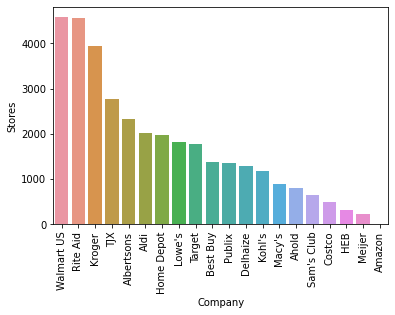

In [ ]:
df_sorted_stores = df.sort_values('Stores', ascending=0)
df_sorted_stores = df_sorted_stores[4:24]
grafico = sns.barplot(x='Company', y='Stores', data=df_sorted_stores)
for item in grafico.get_xticklabels():
    item.set_rotation(90)

In [ ]:
df_sorted_stores = df.sort_values('Stores', ascending=0)
df_sorted_stores = df_sorted_stores[4:24].mean()
df_sorted_stores

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Sales                 76924.950000
Stores                 1806.105263
Sales/Avg. Store         43.476975
Store Count Growth        0.024637
dtype: float64

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

Text(0, 0.5, 'Ventas en millones de dólares')

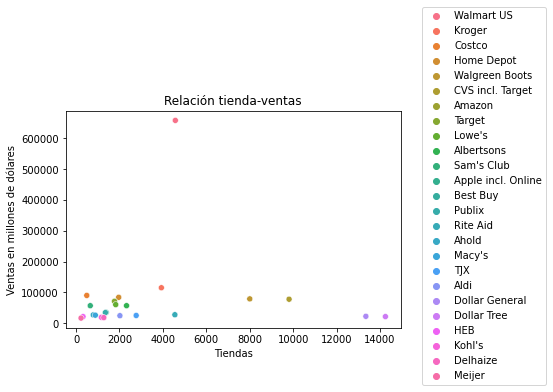

In [ ]:
sns.scatterplot(data=df, x='Stores', y='Sales', hue='Company') 
plt.legend(bbox_to_anchor=(1.05, 1.5), loc='upper left')
plt.title('Relación tienda-ventas')
plt.xlabel('Tiendas')
plt.ylabel('Ventas en millones de dólares')

En base al gráfico anterior se puede ver que no existe una relación directa con el número de tiendas

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
rango = str(df['Sales'].max() - df['Sales'].min())
print('El rango que existe entre las ventas es: $' + rango)


El rango que existe entre las ventas es: $641527


Pero si se analiza a través de un diagrama de dispersión como puede ser un gráfico de caja se puede orbservar que las ventas de walmart generan un valor atípico haciendo que el rango sea mucho mayor. 

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales'>

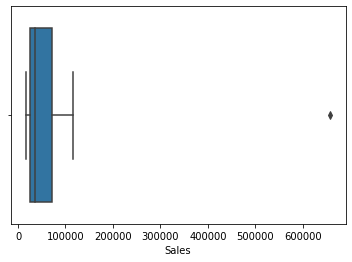

In [ ]:
sns.boxplot(df['Sales'])

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

Text(0, 0.5, 'Tiendas fisicas')

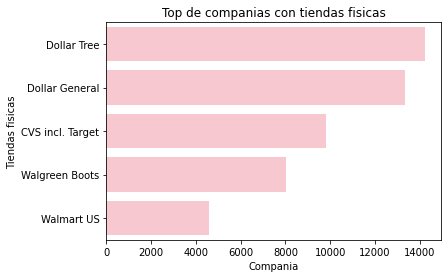

In [ ]:
stores = df.sort_values('Stores', ascending=0)[0:5]
sns.barplot(data=stores, x='Stores', y='Company', color='pink')
plt.title('Top de companias con tiendas fisicas')
plt.xlabel('Compania')
plt.ylabel('Tiendas fisicas')


Las 5 empresas que más tiendas físicas tienen como se puede ver en el gráfico son: Dollar Tree, Dollar General, CVS, Walgreen Boots y Walmart

Text(0, 0.5, 'Companías')

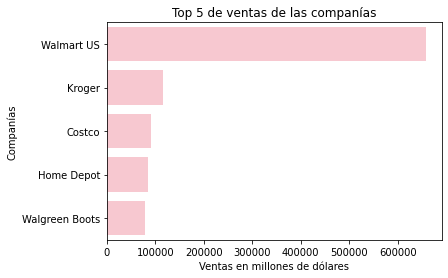

In [ ]:
sales = df.sort_values('Sales', ascending=0)[0:5]
sns.barplot(data=sales, x='Sales', y='Company', color='pink')
plt.title('Top 5 de ventas de las companías')
plt.xlabel('Ventas en millones de dólares')
plt.ylabel('Companías')

A partir del gráfico anterior se puede ver que las 5 empresas con más ventas son: Walmart, Kroger, Costco, Home Depot, Walgreen Boots. 

Evaluando los dos gráficos anteriores se pueden ver que en el top de 5 empresas que más tiendas físicas existen se encuentran 2 de las compañías con más ventas que son: Walmart y Walgreen Boots.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

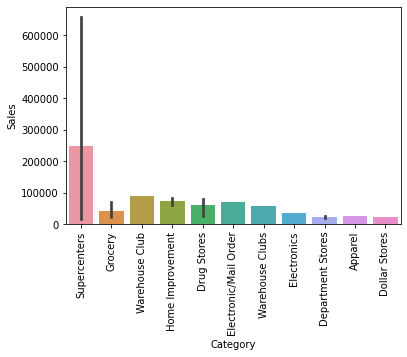

In [ ]:
grafica = sns.barplot(data=df, x='Category', y='Sales')
for item in grafica.get_xticklabels():
    item.set_rotation(90)

Gracias al gráfico de barras se puede observar que la categoría Supercenters es la que más ventas generó. Podemos calcular exactamente cuánto dinero generó:

In [ ]:
df_top_category = df.groupby('Category')['Sales'].sum()
df_top_category =df_top_category.sort_values(ascending=False)[0]
df_top_category
print('La categoría que más ganancia generó fue la de Supercenters con un total de ventas de $' + str(df_top_category) + ' millones de dólares')

La categoría que más ganancia generó fue la de Supercenters con un total de ventas de $745919 millones de dólares


### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

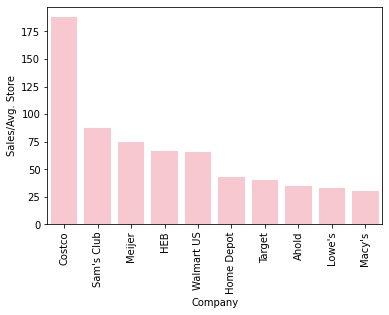

In [ ]:
df_sorted_salesavg = df.sort_values('Sales/Avg. Store',ascending=0)[0:10]
grafico2 = sns.barplot(data=df_sorted_salesavg, x='Company', y='Sales/Avg. Store', color='pink')
for item in grafico2.get_xticklabels():
    item.set_rotation(90)


Se puede observar que la empresa que genera más ventas en relación a su cantidad de tiendas es Costco. 

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [ ]:
online_stores = df[df['Stores'].isnull()]
online_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN


Se puede observar que de las 25 companías las únicas que no tienen tiendas físicas son Amazon y Apple incl. Online

In [ ]:
df['Sales'].median()


34980.0

La media de ventas de las companías es $34.980, por lo tanto las companías que venden de forma online, aunque no pertenecen al TOP 5 de ventas como vimos gráficos anteriores, están por encima de la media de ventas. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b5b6059b-3913-4f35-8b78-026424285b4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>